Text(0, 0.5, 'y')

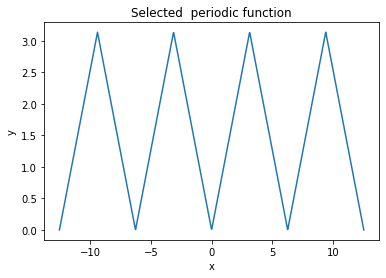

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error

x = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
data = 0.5 * np.pi* signal.sawtooth(2 * np.pi * 1/2/np.pi * x, 0.5) + 0.5 * np.pi
plt.plot(x, data)
plt.title("Selected  periodic function")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

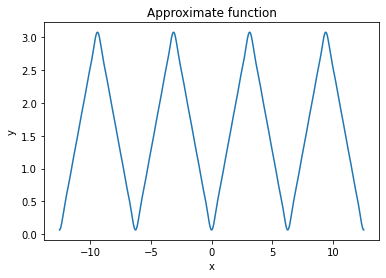

In [2]:
def fourier(x,a0 ,an, bn):
    tmp1 = []

    for n in range(1, np.size(an)+1):
        tmp = an[n-1] * np.cos(n * x) + bn[n-1] * np.sin(n * x)
        tmp1.append(tmp)
    
    f = a0 + sum(tmp1)
    
    return f

an = []
for i in range(1, 10):
    tmp = 2/(i ** 2 * np.pi)*((-1)** i - 1)
    an.append(tmp)

bn = np.zeros(10)   

y =[]
x = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
for i in range(0,np.size(x)):
    tmp2 = fourier(x[i], 0.5*np.pi, an,bn)
    y.append(tmp2)
plt.plot(x,y)
plt.title("Approximate function")
plt.xlabel("x")
plt.ylabel("y")



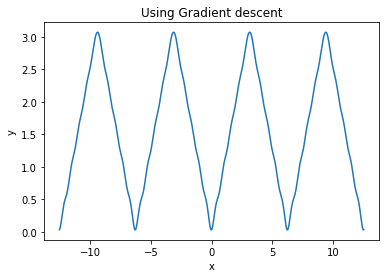

MSE = 0.000543




=== Approximate coefficient ===
a0 = 1.570796
an = [-1.2732395447351628, 0.0, -0.1414710605261292, 0.0, -0.05092958178940651, 0.0, -0.02598448050479924, 0.0, -0.015719006725125467]
bn = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
==== GD update coefficient ====
a0 = 1.575520
an = [-1.27216972e+00  2.25298370e-03 -1.39753030e-01  1.09388282e-03
 -5.08033040e-02 -9.45481368e-04 -2.87476975e-02 -5.13113275e-03
 -2.56788608e-02 -2.16566418e-02]
bn = [0.00488058 0.00099759 0.00246256 0.0024983  0.00338417 0.00359785
 0.00431339 0.00447822 0.00512562 0.00601139]


In [3]:
#  (b)

def dfb1(x, y, N, lr, a0):
    an = 0.5*np.ones(N) 
    bn = 0.5*np.ones(N) 
    
    for i in range(0, np.size(x)):
        a0 = a0 + lr*(y[i] - fourier(x[i], a0 ,an, bn) )
        for k in range(0,N):
           
            an[k] = an[k] + lr *(y[i] - fourier(x[i], a0 ,an, bn))* np.cos((k+1)*x[i])

            bn[k] = bn[k] + lr *(y[i] - fourier(x[i], a0 ,an, bn))*np.sin((k+1)*x[i])
            
 
    return a0 ,an, bn
            
# Pattern Learning    
a0b1, anb1, bnb1 = dfb1(x, data, 10, 0.01, np.pi)  
yb1 =[]
xb1 = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
for i in range(0,np.size(x)):
    tmp2 = fourier(x[i], a0b1, anb1,bnb1)
    yb1.append(tmp2)
plt.plot(xb1,yb1)
plt.title("Using Gradient descent")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

mseb1 = mean_squared_error(data, yb1)
print('MSE = %f' %mseb1)
print('\n\n\n')

print('===============================')
print('=== Approximate coefficient ===')
print('a0 = %f' % (np.pi/2))
print('an = ' + str(an))
print('bn = ' + str(bn))
print('===============================')

print('===============================')
print('==== GD update coefficient ====')
print('a0 = %f' % (a0b1))
print('an = ' + str(anb1))
print('bn = ' + str(bnb1))
print('===============================')

MSE = 0.012342
MSE = 0.002044
MSE = 0.002077
MSE = 0.000778
MSE = 0.000817
MSE = 0.000514
MSE = 0.000562
MSE = 0.000488
MSE = 0.000543
MSE = 0.000546
MSE = 0.000609
MSE = 0.000646
MSE = 0.000716
MSE = 0.000772
MSE = 0.000848
MSE = 0.000917
MSE = 0.001000
MSE = 0.001079


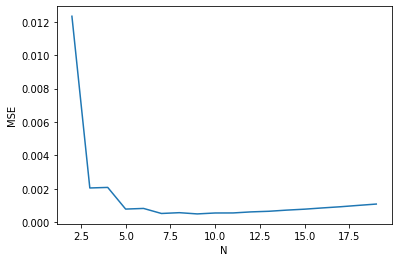

In [4]:
#  (C)
# Pattern Learning
rmsec = []
for k in range(2 ,20):
    a0c, anc, bnc = dfb1(x, data, k, 0.01, np.pi)  
    yc =[]
    xc = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
    for i in range(0,np.size(x)):
        tmp2 = fourier(x[i], a0c, anc, bnc)
        yc.append(tmp2)
    tmp = mean_squared_error(data, yc)
    rmsec.append(tmp)

    print('MSE = %f' %tmp)

plt.plot(range(2,20,1),rmsec)
plt.xlabel("N")
plt.ylabel("MSE")
plt.show()

MSE = 1.827205
MSE = 0.581466
MSE = 0.198647
MSE = 0.070485
MSE = 0.025725
MSE = 0.009700
MSE = 0.003848
MSE = 0.001672
MSE = 0.000852
MSE = 0.000543
MSE = 0.000430
MSE = 0.000391
MSE = 0.000378
MSE = 0.000375
MSE = 0.000373
MSE = 0.000370
MSE = 0.000368
MSE = 0.000366
MSE = 0.000366
MSE = 0.000371
MSE = 0.000384
MSE = 0.000409
MSE = 0.000454
MSE = 0.000525
MSE = 0.000632
MSE = 0.000784
MSE = 0.000992
MSE = 0.001269
MSE = 0.001627
MSE = 0.002078
MSE = 0.002636
MSE = 0.003313
MSE = 0.004121
MSE = 0.005072
MSE = 0.006178
MSE = 0.007450
MSE = 0.008897
MSE = 0.010529
MSE = 0.012355


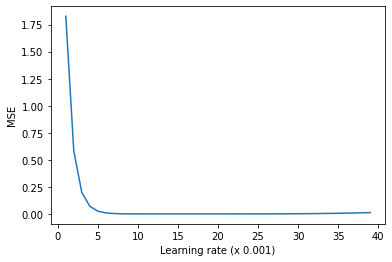

In [9]:
#  (d)
# Pattern Learning
rmsed = []
for k in range(1 ,40):
    a0d, andd, bnd = dfb1(x, data, 10, 0.001* k, np.pi)  
    yd =[]
    xd = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
    for i in range(0,np.size(x)):
        tmp2 = fourier(x[i], a0d, andd, bnd)
        yd.append(tmp2)
    tmp = mean_squared_error(data, yd)
    rmsed.append(tmp)

    print('MSE = %f' %tmp)

plt.plot(range(1,40,1),rmsed)
plt.xlabel("Learning rate (x 0.001)")
plt.ylabel("MSE")
plt.show()

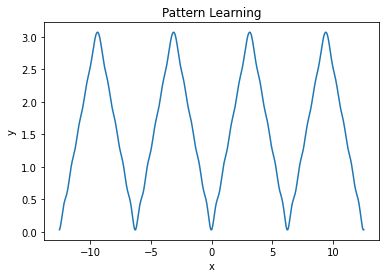

Pattern learning MSE = 0.000543




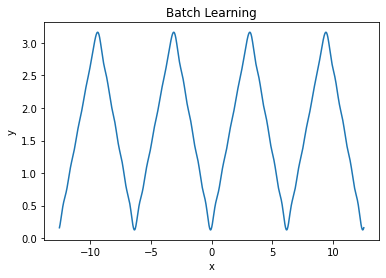

Batch learning MSE = 0.011867


In [12]:
# (e)
def dfe(x, y, N, lr, a0 ,b):
    an = 0.5*np.ones(N) 
    bn = 0.5*np.zeros(N) 
    nx = [x[i:i+b] for i in range(0,len(x),b)]
    ny = [y[i:i+b] for i in range(0,len(y),b)]
    
    p = int(np.size(x)/b)
    for i in range(0, p):
        J = []
        for m in range(0,b):
            tmp = (ny[i][m] - fourier(nx[i][m], a0 ,an, bn) )
            
            J.append(tmp)
            
        a0 = a0 + 1/b*lr*sum(J)
        
        for k in range(0,N):
            
            for h in range(0,b):


                an[k] = an[k] + 1/b * lr *sum(J) *np.cos((k+1)*(nx[i][h]))

                bn[k] = bn[k] + 1/b * lr *sum(J)*np.sin((k+1)*(nx[i][h]))
        
    return a0 ,an, bn

# Pattern Learning    
a0b1, anb1, bnb1 = dfb1(x, data, 10, 0.01, np.pi)  
yb1 =[]
xb1 = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
for i in range(0,np.size(x)):
    tmp2 = fourier(x[i], a0b1, anb1,bnb1)
    yb1.append(tmp2)
plt.plot(xb1,yb1)
plt.title("Pattern Learning")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
mseb1 = mean_squared_error(data, yb1)
print('Pattern learning MSE = %f' %mseb1)
print('\n')


# Batch Learning
a0e, ane, bne = dfe(x, data, 10, 0.01, np.pi ,5)  
ye =[]
xe = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
for i in range(0,np.size(x)):
    tmp2 = fourier(x[i], a0e, ane,bne)
    ye.append(tmp2)
plt.plot(xe,ye)
plt.title("Batch Learning")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

rmsee = mean_squared_error(data, ye)
print('Batch learning MSE = %f' %rmsee)

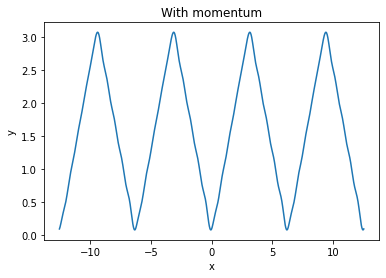

MSE = 0.000626


In [18]:
# (f)
def dff(x, y, N, lr, a0, mo):
    an = 0.5*np.ones(N) 
    bn = 0.5*np.zeros(N) 
    v = 0
    va = 0
    vb = 0
    for i in range(0, np.size(x)):
        v = v * mo - (1 - mo) * lr*(y[i] - fourier(x[i], a0 ,an, bn) )
        a0 = a0 - v
        
        for k in range(0,N):
            va = va * mo - (1 - mo) * lr *(y[i] - fourier(x[i], a0 ,an, bn))* np.cos((k+1)*x[i])
            an[k] = an[k] - va 
            vb = vb * mo - (1 - mo) * lr *(y[i] - fourier(x[i], a0 ,an, bn))* np.sin((k+1)*x[i])
            bn[k] = bn[k] - vb
            
 
    return a0 ,an, bn
            
# Pattern Learning    
a0f, anf, bnf = dff(x, data, 10, 0.01, np.pi, 0.1)  
yf =[]
xf = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
for i in range(0,np.size(x)):
    tmp2 = fourier(x[i], a0f, anf,bnf)
    yf.append(tmp2)
plt.plot(xf,yf)
plt.title("With momentum")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

rmsef = mean_squared_error(data, yf)
print('MSE = %f' %rmsef)

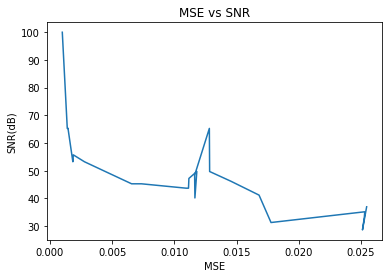

In [60]:
# (g)
def SNR(s,n):
    PS =[]
    PN =[]
    for i in range(0,np.size(s)):
        tmp = s[i] - np.mean(s)
        PS.append(tmp)
    if np.size(n) > 1:    
        for k in range(0,np.size(n)):
            tmp = n[k] - np.mean(n)
            
            PN.append(tmp)
       
        snr = 20 * np.log10((abs(sum(PS)+1e-22)/abs(sum(PN)+1e-22)))
       
    else:
        snr = 100
    return snr
    
snr = []
rmseg = []
xgn = []
gn = []
nx = []
ny = []

for i in range (0, 25):
    
    tmp =  random.uniform(-4 * np.pi, 4 * np.pi)
    nx.append(tmp)
    tmp =  random.uniform(0,  np.pi)
    ny.append(tmp)
    xg = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
    xgn = np.append(xg,nx)
    gn = np.append(data,ny)

    tmp = SNR(data,ny)
    snr.append(tmp)
    
    a0g, ang, bng = dfb1(xgn, gn, 10, 0.01, np.pi)  
    yg =[]
    for i in range(0,np.size(x)):
        tmp2 = fourier(xgn[i], a0g, ang,bng)
        yg.append(tmp2)
    tmp = mean_squared_error(data, yg)
    rmseg.append(tmp)

plt.plot(rmseg,snr)
plt.title("MSE vs SNR")
plt.ylabel("SNR(dB)")
plt.xlabel("MSE")
plt.show()